# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import pandas as pd
import numpy as np

In [2]:
Insurance_df = pd.read_csv("insurance.csv")

In [3]:
Insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
Insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
Insurance_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [13]:
Insurance_df.shape

(1338, 7)

# Question 2 - Check the distribution of expenses(charges) and state your insights.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

D:\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


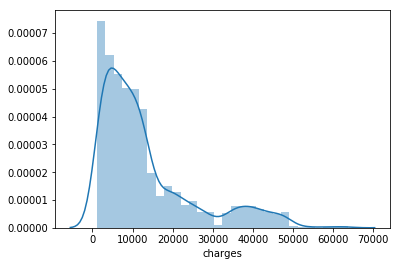

In [5]:
sns.distplot(Insurance_df["charges"])

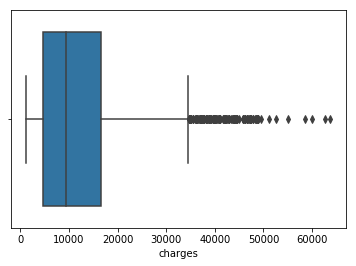

In [6]:
sns.boxplot(x=Insurance_df["charges"])

I see two intepretations. 1) The data seems to be skewed to the right with a lot of outliers. 2) In the distribution, there are two gaussians which indicates that data could have come from 2 different processes.

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [7]:
Insurance_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The correlation between children and charges is less then 0.1 but hopefully this will be compensated by age and bmi whick have a slightly better correlation with charges

# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [14]:
Insurance_feature_df = Insurance_df.drop(labels="charges", axis=1)

In [15]:
Insurance_feature_df.shape

(1338, 6)

In [16]:
Insurance_labels = Insurance_df['charges']

In [17]:
Insurance_labels.shape

(1338L,)

In [18]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(Insurance_feature_df, Insurance_labels, test_size=0.30, random_state=1)

# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [30]:
dummy_train = pd.get_dummies(X_train,columns=['sex','smoker', 'region'])

In [31]:
dummy_train.head(5)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
744,50,26.41,0,0,1,1,0,0,1,0,0
363,21,26.40,1,1,0,1,0,0,0,0,1
10,25,26.22,0,0,1,1,0,1,0,0,0
970,50,28.16,3,1,0,1,0,0,0,1,0
634,51,39.70,1,0,1,1,0,0,0,0,1


In [32]:
X_train.shape

(936, 6)

In [33]:
dummy_train.shape

(936, 11)

In [35]:
dummy_test = pd.get_dummies(X_test, columns=['sex', 'smoker', 'region'])

In [36]:
X_test.shape

(402, 6)

In [37]:
dummy_test.shape

(402, 11)

# Question 6 - Train your model.

In [38]:
from sklearn.linear_model import LinearRegression

In [40]:
linear_model = LinearRegression()
linear_model.fit(dummy_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [46]:
linear_model.coef_

array([   251.68186515,    322.38910684,    344.9642553 ,    141.3981733 ,
         -141.3981733 , -12029.69523846,  12029.69523846,    527.9051883 ,
          223.81509065,   -411.4369086 ,   -340.28337035])

In [47]:
linear_model.intercept_

321.15345829135003

# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [48]:
linear_model.score(dummy_train, Y_train)

0.7545557492633161

In [49]:
linear_model.score(dummy_test, Y_test)

0.740598931692721

In [3]:
from sklearn import metrics

In [51]:
Y_predict = linear_model.predict(dummy_test)

In [52]:
metrics.mean_absolute_error(Y_test, Y_predict)

4139.932064766012

In [54]:
metrics.mean_squared_error(Y_test, Y_predict)

36761456.35201328

In [55]:
metrics.r2_score(Y_test, Y_predict)

0.740598931692721

# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [4]:
from sklearn.naive_bayes import GaussianNB

In [27]:
Iris_df = pd.read_csv("Iris.csv")

In [28]:
Iris_df.dtypes

slength    float64
swidth     float64
plength    float64
pwidth     float64
species     object
dtype: object

In [29]:
Iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
slength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
swidth,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
plength,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
pwidth,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [30]:
Iris_df.shape

(150, 5)

## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

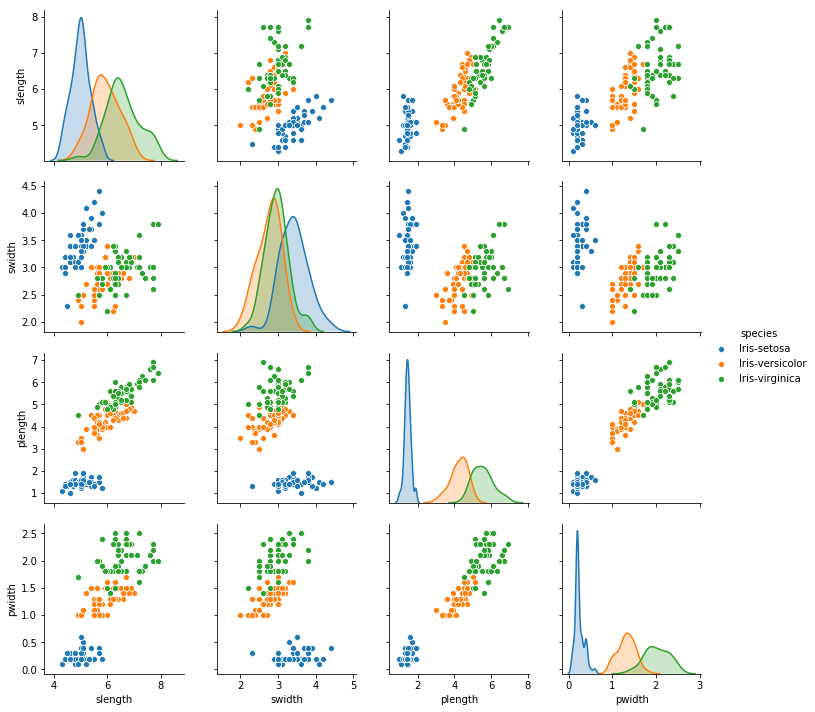

In [31]:
sns.pairplot(Iris_df , diag_kind = "kde", hue="species")

slength - 3 gaussians with diff peaks. Looks like virginica has some outliers towards the right
swidth - Two species seem to have similiar means. This predictor not a good classifier
plenght - 3 gaussians with diff peaks
pwidth - 3 gaussians with diff peaks

## Question 11- Do Feature Scaling 

In [32]:
from scipy.stats import zscore

In [33]:
Iris_df["species"] = Iris_df.species.astype("category")

In [34]:
Iris_df.dtypes

slength     float64
swidth      float64
plength     float64
pwidth      float64
species    category
dtype: object

In [35]:
Iris_df.groupby(["species"]).count()

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [36]:
Iris_df_feature = Iris_df.drop(labels="species", axis=1)

In [37]:
Iris_df_feature.shape

(150, 4)

In [38]:
y = Iris_df["species"]

In [39]:
y.shape

(150,)

In [40]:
Iris_df_feature.head(5)

,slength,swidth,plength,pwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
X = Iris_df_feature.apply(zscore)

In [42]:
X.head(5)

,slength,swidth,plength,pwidth
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Question 12- Train and Fit NaiveBayes Model

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [45]:
nb_model = GaussianNB()

In [46]:
nb_model.fit(X_train, y_train)

GaussianNB(priors=None)

## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [47]:
nb_model.score(X_train, y_train)

0.9523809523809523

In [48]:
y_predict = nb_model.predict(X_test)

In [49]:
nb_model.score(X_test, y_test)

0.9333333333333333

In [51]:
print(metrics.confusion_matrix(y_test, y_predict))

[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]


In [52]:
print(metrics.classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.86      0.92      0.89        13

    avg / total       0.94      0.93      0.93        45



precision = Actual class/Model considers as Class
recall = Predicted Class/Total Class

Iris-setosa has a 100% precision and recall.
Iris-versicolor - Precision is higher than recall.
Iris-virginica - Recall is higher than precision.

Objective is to have a good precision and good model for each class

# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf_model = RandomForestClassifier(criterion='entropy',max_depth=3,random_state=0)

In [55]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
rf_model.score(X_train,y_train)

0.9619047619047619

In [57]:
y_predict_rf = rf_model.predict(X_test)

In [58]:
metrics.accuracy_score(y_test, y_predict_rf)

0.9555555555555556

In [60]:
print(metrics.classification_report(y_test, y_predict_rf))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

    avg / total       0.96      0.96      0.96        45



Precision and recall have improved for Class 2 & 3 compared to NaiveClassifier and are balanced.

## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gb_model = GradientBoostingClassifier(n_estimators=51)

In [63]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [64]:
gb_model.score(X_train, y_train)

1.0

In [65]:
y_predict_gb = gb_model.predict(X_test)

In [66]:
metrics.accuracy_score(y_test, y_predict_gb)

0.9555555555555556

In [67]:
print(metrics.classification_report(y_test, y_predict_gb))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

    avg / total       0.96      0.96      0.96        45



The score for training data is 100% which is not good.
Otherwise, the outcome on test data is very similiar to what was attained with RandomForest.